Unstructured Partition 3가지 타입
1. auto
2. fast
3. hi-res
4. OCR-only

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

import fitz
import io
from PIL import Image, ImageDraw
from unstructured.partition.auto import partition

### PDF 파일 불러오기

In [3]:
file_path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Word_docs_sampling.pdf'

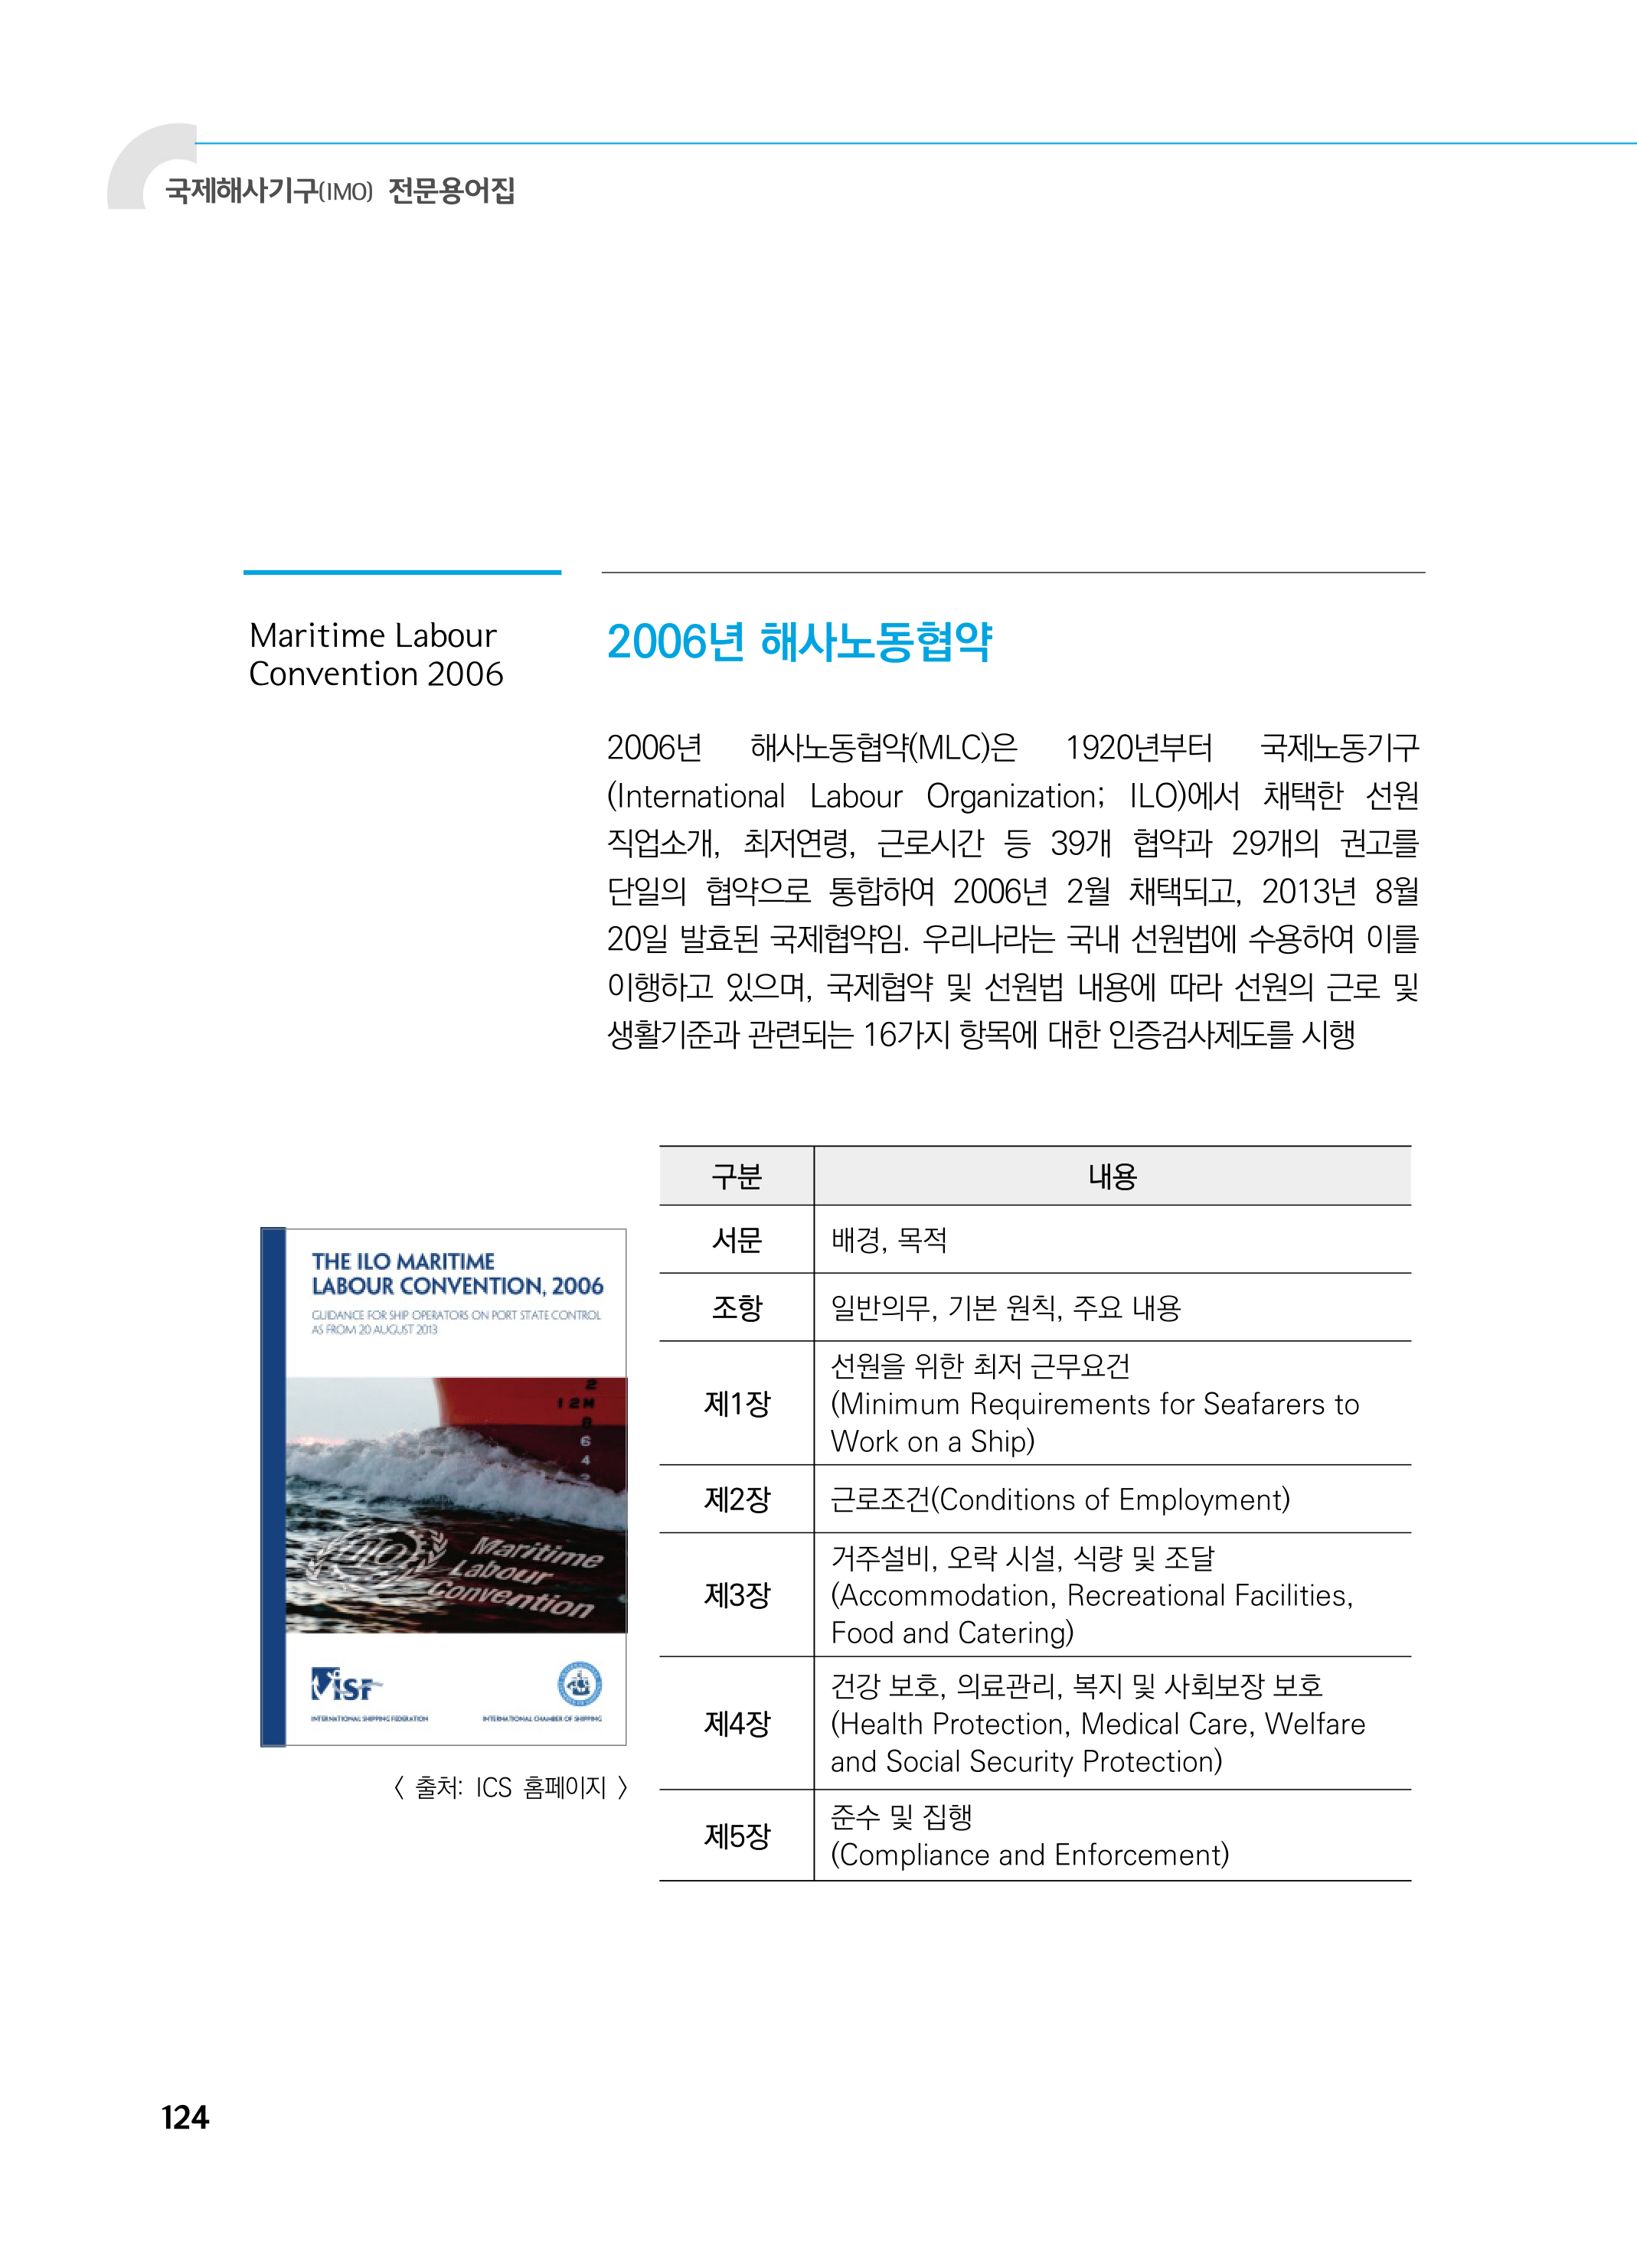

In [4]:
# PyMuPDF로 PDF 이미지 변경
doc = fitz.open(file_path)
page = doc.load_page(0)
pix = page.get_pixmap(dpi=300)
img = Image.open(io.BytesIO(pix.tobytes()))
img

In [5]:
# 세부적으로 파티션을 나누는 과정
def process_draw_box(page, elements):
    for element in elements:
        copy_page = page.copy()
        draw = ImageDraw.Draw(copy_page)

        coords = element.metadata.coordinates.points
        top_left = coords[0]
        bottom_right = coords[2]
        draw.rectangle((top_left, bottom_right), outline="red", width=6)

        plt.imshow(copy_page)
        plt.axis('off')
        plt.show()

In [7]:
# 전체 파티션을 나누는 과정
def process_draw_full_box(page, elements):
    copy_page = page.copy()
    draw = ImageDraw.Draw(copy_page)
    
    for element in elements:
        coords = element.metadata.coordinates.points
        top_left = coords[0]
        bottom_right = coords[2]
        draw.rectangle((top_left, bottom_right), outline="red", width=6)

        plt.imshow(copy_page)
        plt.axis('off')
        plt.show()

### Auto로 파티션

In [59]:
# pdf 경로로 파티션 진행
auto_elements = partition(
    filename=file_path,
    strategy="auto",
    languages=['kor', 'eng']
)
print(len(auto_elements))

22


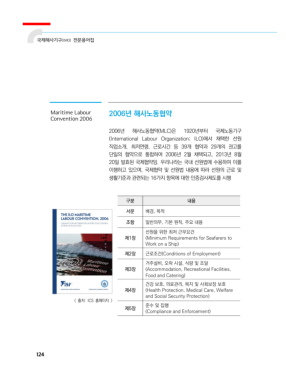

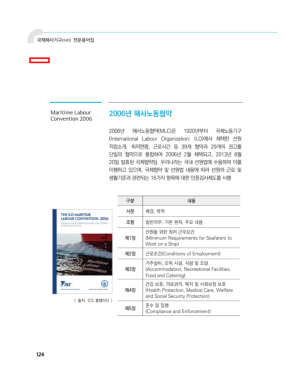

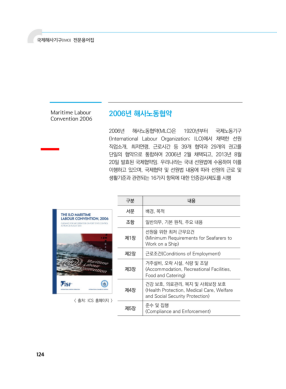

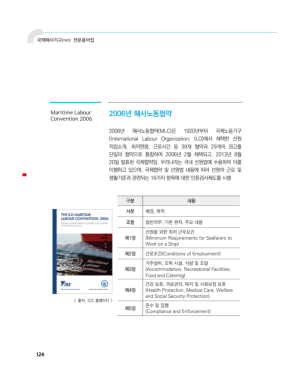

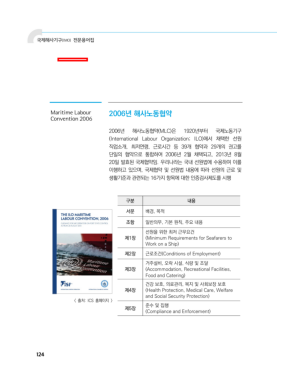

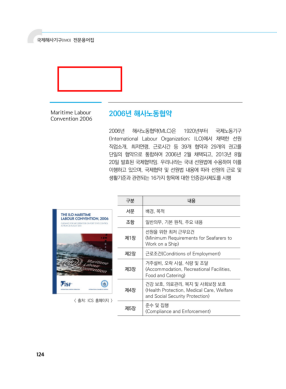

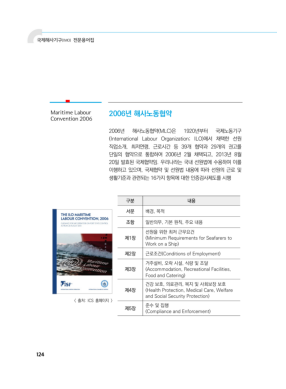

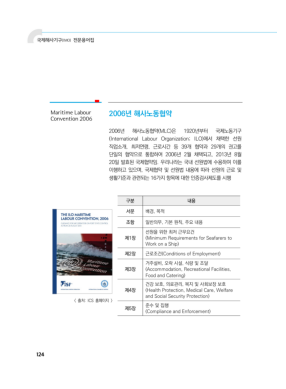

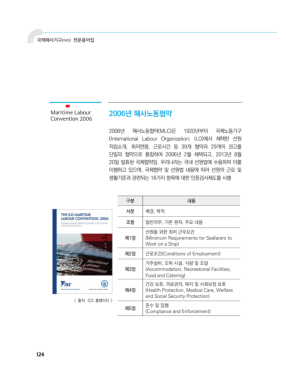

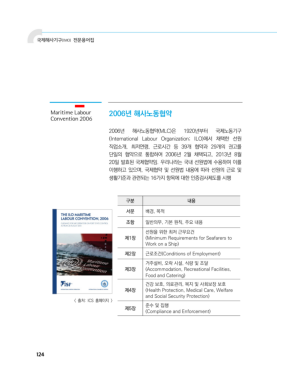

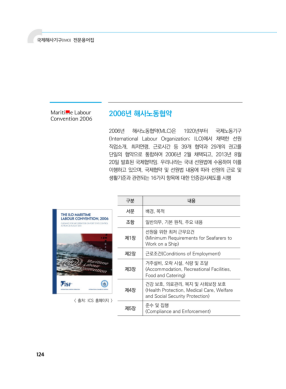

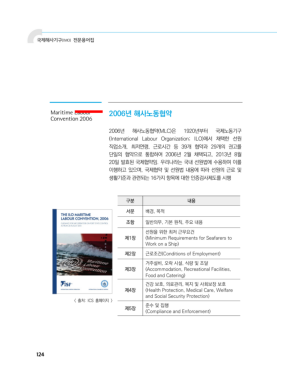

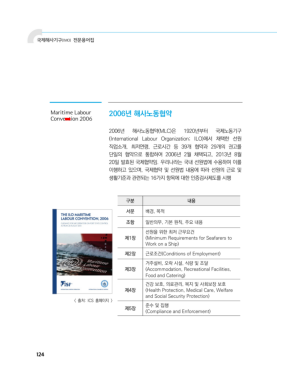

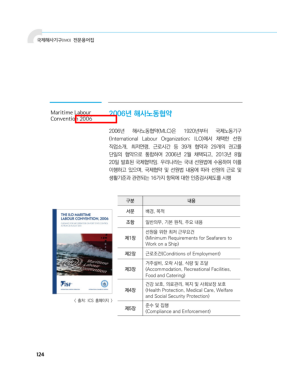

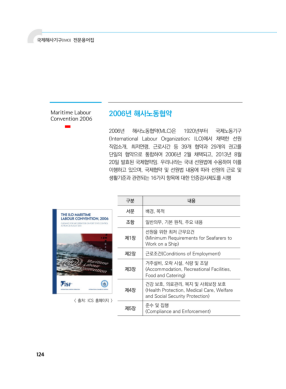

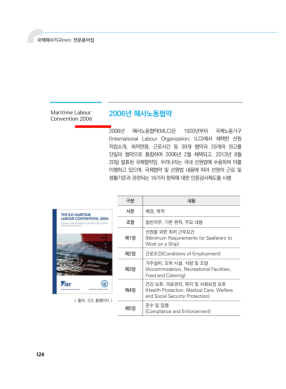

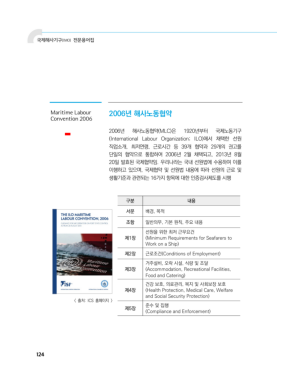

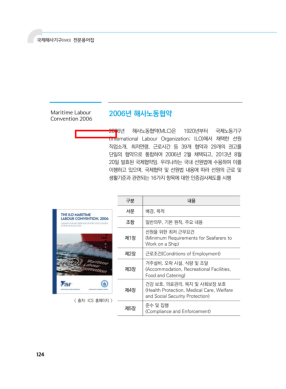

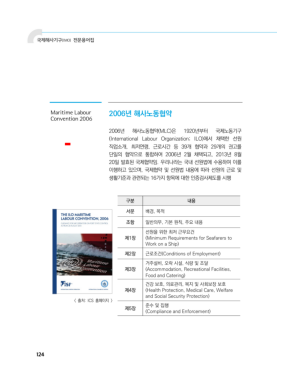

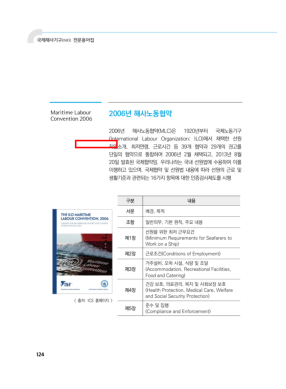

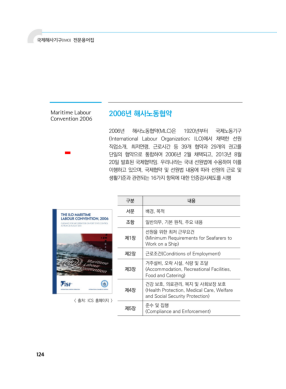

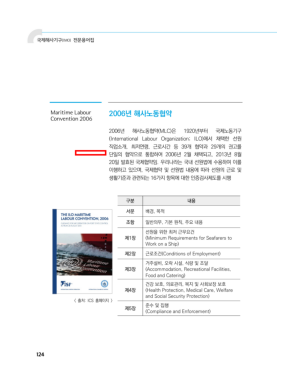

In [60]:
process_draw_box(img, auto_elements)

### fast 방법 - 이미지 파일은 지원 안함

In [68]:
fast_elements = partition(
    filename=file_path, 
    strategy="fast",
    languages=['kor', 'eng'])

print(len(fast_elements))

22


### hi-res 방법

In [8]:
# 읽을 수 있는 바이너리 파일로 전환
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
img_byte_arr.seek(0)

hi_res_elements_img = partition(
    file=img_byte_arr, 
    strategy="hi_res",
    languages=['kor', 'eng'])

print(len(hi_res_elements_img))

6


In [13]:
for i in hi_res_elements_img:
    print(i)

국 제 해 사 기 구 (70) 전 문 용어집
Maritime Labour Convention 2006
20064 해 사 노 동 협 약
2006 년 해 사 노 동 협 약 (/Ｌ(:) 은 _ 1920 년 부터 국 제 노 동 기구 (International Labour Organization; 1Ｌ0) 에 서 채택한 선원 직 업 소개, AAMAS, 근 로 시간 등 39 개 협 약 과 29 개 의 권 고 를 단 일 의 협 약 으로 통 합 하여 2006 년 2 월 채 택 되 고 《, 2013 년 8 월 20 일 발 효 된 국 제 협 약 임 . vee Fe 국내 선 원 법 에 수 용 하여 이를 협약 및 선 원 법 내 용 에 따라 선 원 의 근로 및 련 되는 16 가 지 항 목 에 대한 인 증 검 사 제 도 를 시행
THE ILO MARITIME LABOUR CONVENTION, 2006 구분 내용 서문 | 배경, 목적 조항 ㅣ 일 반 의무, 기본 원칙, 주요 내용 선 원 을 위한 최저 근 무 요건 제 1 장 (Minimum Requirements for Seafarers to Work on a Ship) 제 2 장 22242 (Conditions of Employment) 거 주 설비, 오락 시설, 식량 AA 제 3 장 (Accommodation, Recreational Facilities, Food and Catering) 건강 보호, 의 료 관리, 복지 및 사 회 보장 보호 제 4 장 (Health Protection, Medical Care, Welfare < 출처: 105 홈 페 이 ㅅ ) and Social Security Protection) 제 5 장 준수 및 집행 © (Compliance and Enforcement)
124


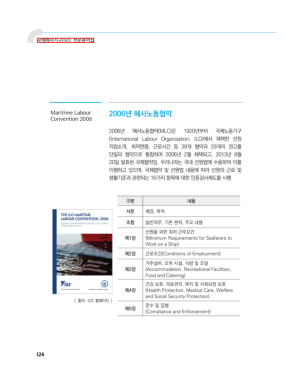

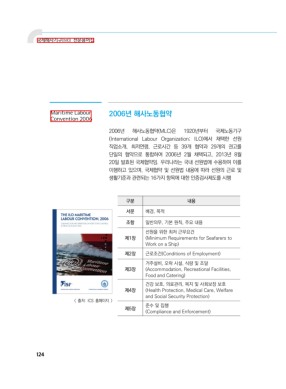

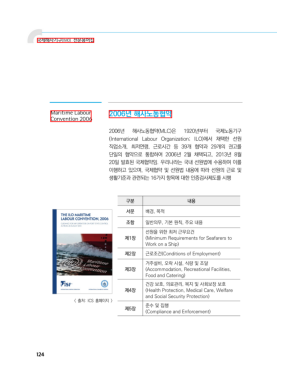

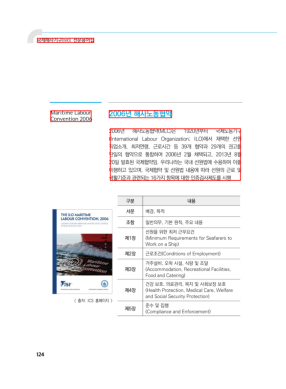

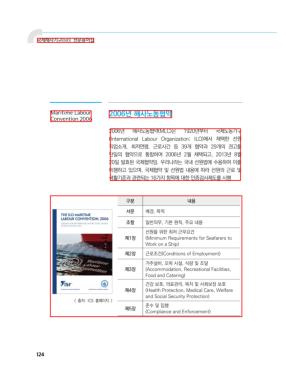

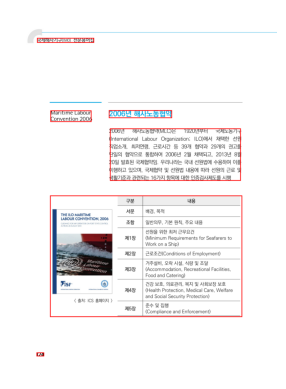

In [9]:
process_draw_full_box(img, hi_res_elements_img)

In [77]:
ocr_only_elements_pdf = partition(
    filename=file_path, 
    strategy="hi_res",
    languages=['kor', 'eng'])

print(len(ocr_only_elements_pdf))

12


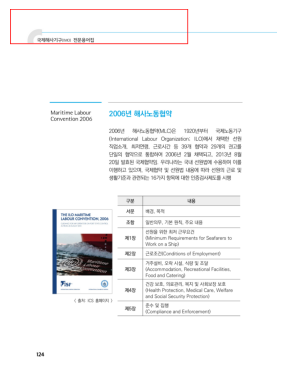

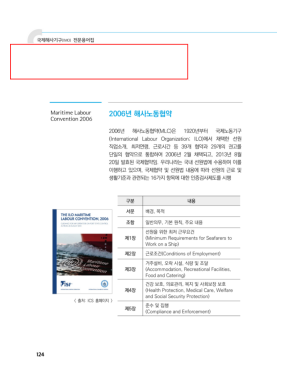

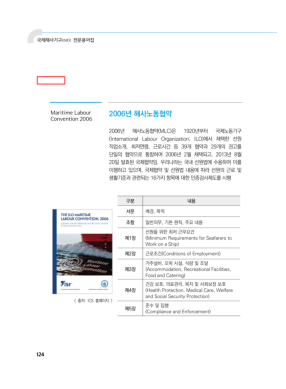

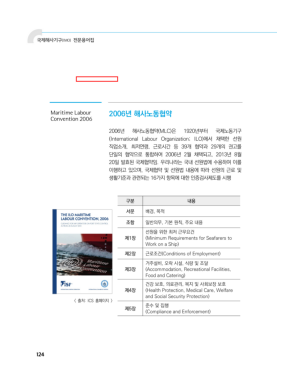

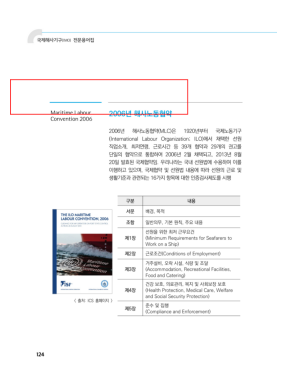

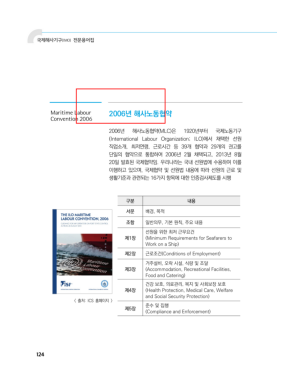

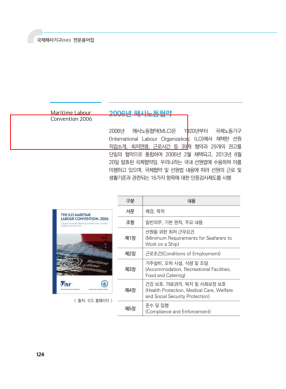

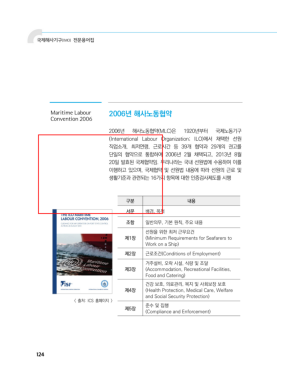

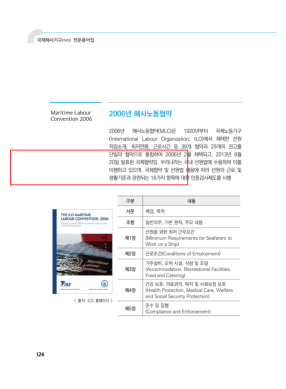

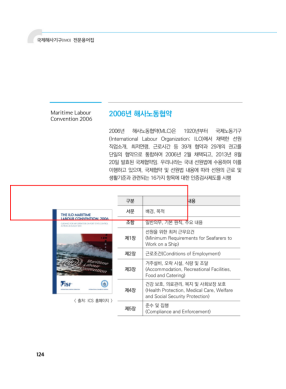

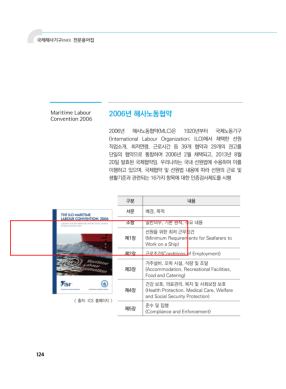

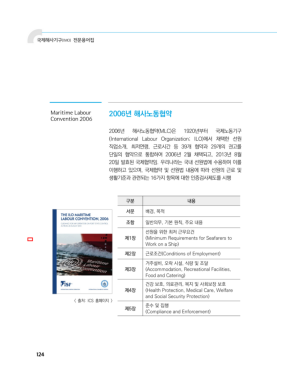

In [78]:
process_draw_box(img, ocr_only_elements_pdf)

### OCR-only 방법

In [10]:
ocr_only_elements = partition(
    file=img_byte_arr, 
    strategy="ocr_only",
    languages=['kor', 'eng'])

print(len(ocr_only_elements))

15


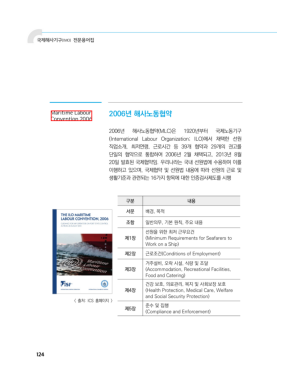

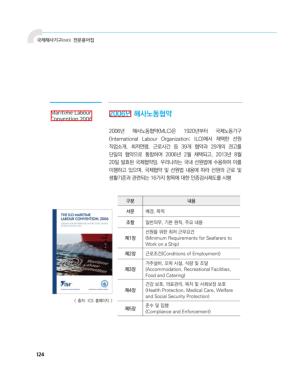

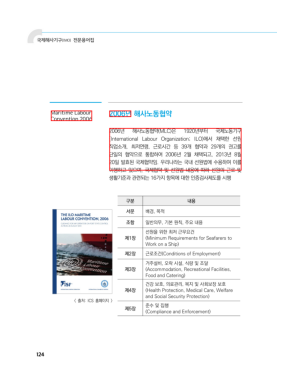

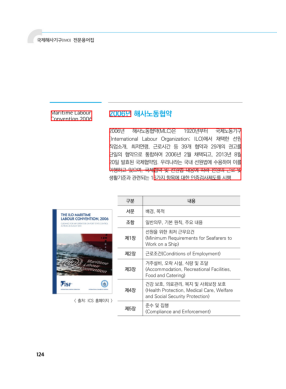

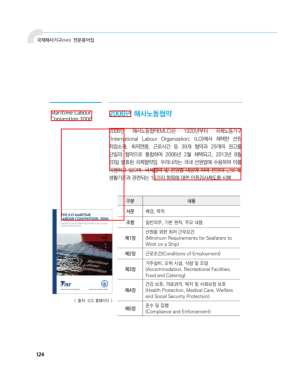

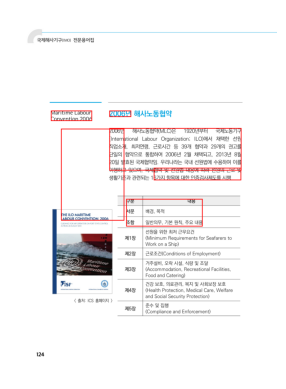

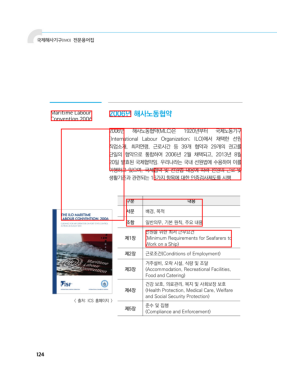

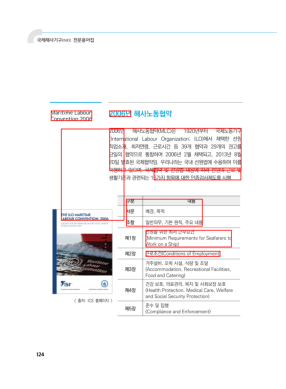

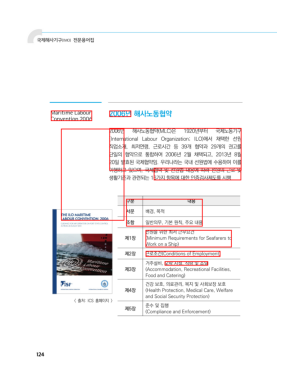

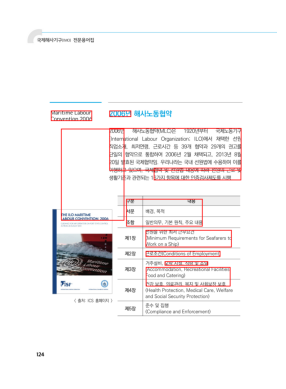

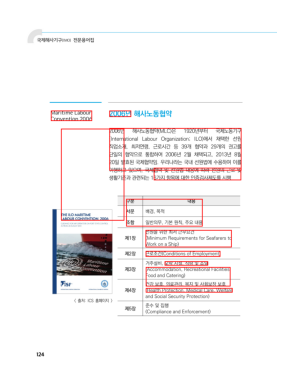

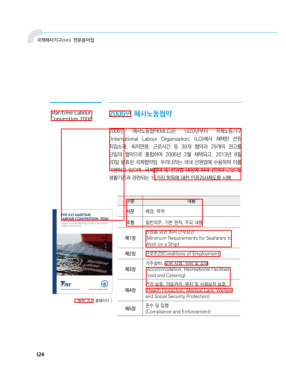

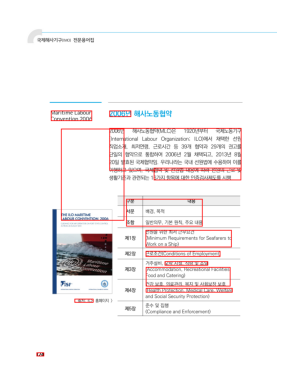

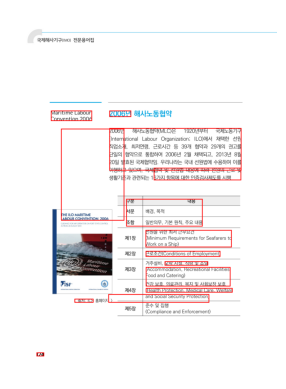

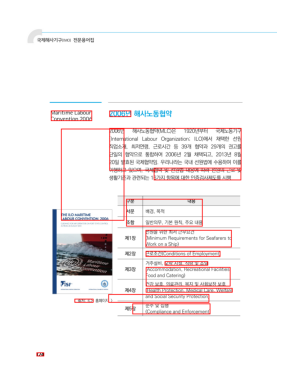

In [11]:
process_draw_full_box(img, ocr_only_elements)

출처
Unstructured 공식문서: https://docs.unstructured.io/open-source/core-functionality/partitioning#partition-pdf
